In [ ]:
import numpy as np 
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv("transactions_list.csv",names=['products'],header=0)
df

,products
0,"tropicalfruit,yogurt,coffee"
1,wholemilk
2,"pipfruit,yogurt,creamcheese,meatspreads"
3,"othervegetables,wholemilk,condensedmilk,longli..."
4,"wholemilk,butter,yogurt,rice,abrasivecleaner"
...,...
9829,"sausage,chicken,beef,hamburgermeat,citrusfruit..."
9830,cookingchocolate
9831,"chicken,citrusfruit,othervegetables,butter,yog..."
9832,"semi-finishedbread,bottledwater,soda,bottledbeer"


In [5]:
data = list(df["products"].apply(lambda x:x.split(',')))
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)
df

,Instantfoodproducts,UHT-milk,abrasivecleaner,artif.sweetener,babycosmetics,babyfood,bags,bakingpowder,bathroomcleaner,beef,berries,beverages,bottledbeer,bottledwater,brandy,brownbread,butter,buttermilk,cakebar,candles,candy,cannedbeer,cannedfish,cannedfruit,cannedvegetables,catfood,cereals,chewinggum,chicken,chocolate,chocolatemarshmallow,citrusfruit,cleaner,clingfilm/bags,cocoadrinks,coffee,condensedmilk,cookingchocolate,cookware,cream,creamcheese,curd,curdcheese,decalcifier,dentalcare,dessert,detergent,dishcleaner,dishes,dogfood,domesticeggs,femalesanitaryproducts,finishedproducts,fish,flour,flower(seeds),flowersoil/fertilizer,frankfurter,frozenchicken,frozendessert,frozenfish,frozenfruits,frozenmeals,frozenpotatoproducts,frozenvegetables,fruit/vegetablejuice,grapes,hairspray,ham,hamburgermeat,hardcheese,herbs,honey,housekeepingproducts,hygienearticles,icecream,instantcoffee,jam,ketchup,kitchentowels,kitchenutensil,lightbulbs,liqueur,liquor,liquor(appetizer),liverloaf,longlifebakeryproduct,makeupremover,malecosmetics,margarine,mayonnaise,meat,meatspreads,misc.beverages,mustard,napkins,newspapers,nuts/prunes,nutsnack,oil,onions,organicproducts,organicsausage,othervegetables,packagedfruit/vegetables,pasta,pastry,petcare,photo/film,pickledvegetables,pipfruit,popcorn,pork,potatoproducts,pottedplants,preservationproducts,processedcheese,prosecco,puddingpowder,readysoups,red/blushwine,rice,rollproducts,rolls/buns,rootvegetables,rubbingalcohol,rum,saladdressing,salt,saltysnack,sauces,sausage,seasonalproducts,semi-finishedbread,shoppingbags,skincare,slicedcheese,snackproducts,soap,soda,softcheese,softener,soundstoragemedium,soups,sparklingwine,specialtybar,specialtycheese,specialtychocolate,specialtyfat,specialtyvegetables,spices,spreadcheese,sugar,sweetspreads,syrup,tea,tidbits,toiletcleaner,tropicalfruit,turkey,vinegar,waffles,whipped/sourcream,whisky,whitebread,whitewine,wholemilk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [6]:
# Apriori
low = apriori(df, min_support = 0.01, use_colnames = True, verbose = 1)
low.sort_values("support", ascending = False)

Processing 128 combinations | Sampling itemset size 43


,support,itemsets
86,0.26,(wholemilk)
55,0.19,(othervegetables)
66,0.18,(rolls/buns)
75,0.17,(soda)
87,0.14,(yogurt)
...,...,...
178,0.01,"(sausage, frankfurter)"
306,0.01,"(yogurt, wholemilk, curd)"
160,0.01,"(rolls/buns, curd)"
212,0.01,"(napkins, tropicalfruit)"


In [7]:
# Apriori
high = apriori(df, min_support = 0.05, use_colnames = True, verbose = 1)
high.sort_values("support", ascending = False)

Processing 6 combinations | Sampling itemset size 3 2


,support,itemsets
26,0.26,(wholemilk)
15,0.19,(othervegetables)
19,0.18,(rolls/buns)
23,0.17,(soda)
27,0.14,(yogurt)
2,0.11,(bottledwater)
20,0.11,(rootvegetables)
24,0.10,(tropicalfruit)
22,0.10,(shoppingbags)
21,0.09,(sausage)


In [8]:
# Association Rules & Info
df_ar_low = association_rules(low, metric='confidence', min_threshold=0.5, num_itemsets=None)
df_ar_low

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(othervegetables, butter)",(wholemilk),0.02,0.26,0.01,0.57,2.24,1.00,0.01,1.75,0.57,0.04,0.43,0.31
1,"(rootvegetables, citrusfruit)",(othervegetables),0.02,0.19,0.01,0.59,3.03,1.00,0.01,1.95,0.68,0.05,0.49,0.32
2,"(yogurt, curd)",(wholemilk),0.02,0.26,0.01,0.58,2.28,1.00,0.01,1.78,0.57,0.04,0.44,0.31
3,"(domesticeggs, othervegetables)",(wholemilk),0.02,0.26,0.01,0.55,2.16,1.00,0.01,1.66,0.55,0.05,0.40,0.30
4,"(pipfruit, othervegetables)",(wholemilk),0.03,0.26,0.01,0.52,2.03,1.00,0.01,1.54,0.52,0.05,0.35,0.29
5,"(rolls/buns, rootvegetables)",(othervegetables),0.02,0.19,0.01,0.50,2.59,1.00,0.01,1.62,0.63,0.06,0.38,0.28
6,"(rootvegetables, tropicalfruit)",(othervegetables),0.02,0.19,0.01,0.58,3.02,1.00,0.01,1.94,0.68,0.06,0.48,0.32
7,"(yogurt, rootvegetables)",(othervegetables),0.03,0.19,0.01,0.50,2.58,1.00,0.01,1.61,0.63,0.06,0.38,0.28
8,"(othervegetables, whipped/sourcream)",(wholemilk),0.03,0.26,0.01,0.51,1.98,1.00,0.01,1.51,0.51,0.05,0.34,0.28
9,"(yogurt, othervegetables)",(wholemilk),0.04,0.26,0.02,0.51,2.01,1.00,0.01,1.53,0.52,0.08,0.35,0.30


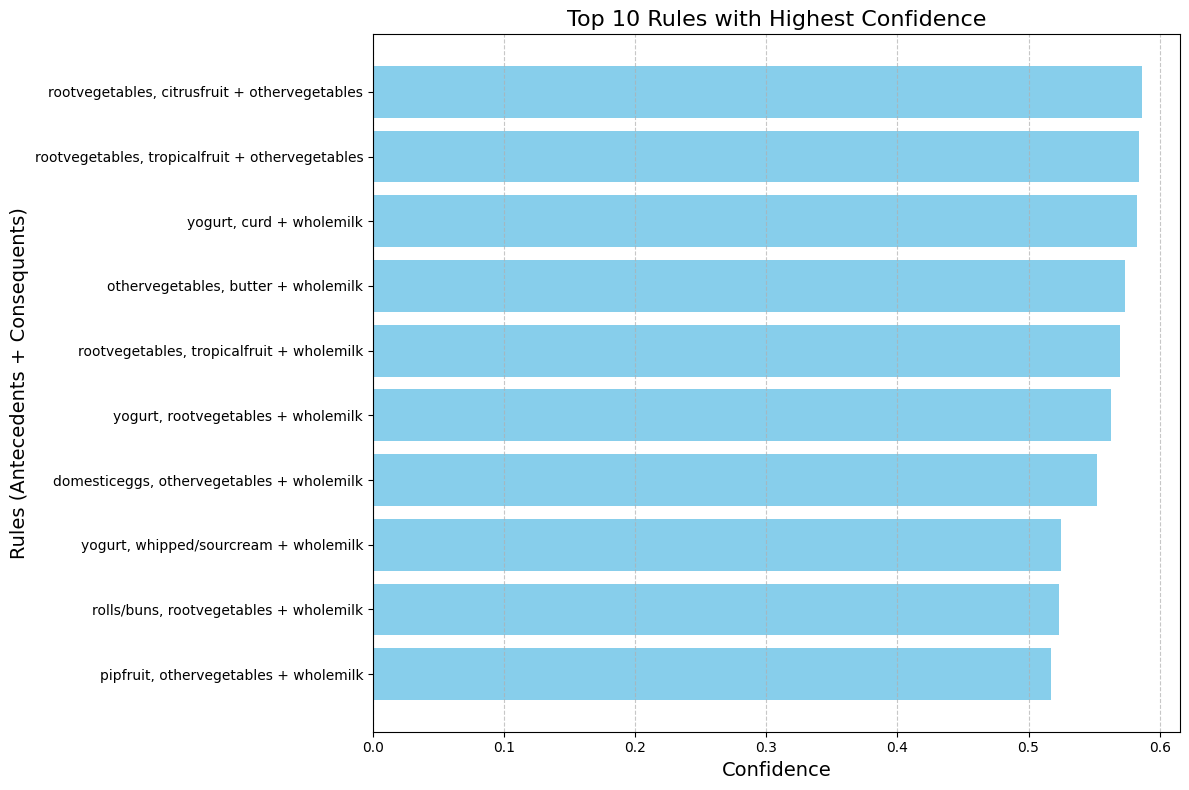

In [9]:
import matplotlib.pyplot as plt
# Giả sử df_ar_low đã được định nghĩa, tiến hành lấy top 10 confidence cao nhất và vẽ biểu đồ

# Lấy top 10 dòng có confidence cao nhất, sắp xếp theo thứ tự tăng dần
df_top10 = df_ar_low.nlargest(10, 'confidence').sort_values(by='confidence', ascending=True)

# Tạo cột "rule" để ghép tên sản phẩm
df_top10["rule"] = df_top10["antecedents"].apply(lambda x: ", ".join(list(x))) + " + " + df_top10["consequents"].apply(lambda x: ", ".join(list(x)))

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(12, 8))
plt.barh(df_top10["rule"], df_top10["confidence"], color='skyblue')  # barh để vẽ cột ngang

# Tùy chỉnh biểu đồ
plt.title("Top 10 Rules with Highest Confidence", fontsize=16)
plt.xlabel("Confidence", fontsize=14)
plt.ylabel("Rules (Antecedents + Consequents)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [10]:
# Association Rules & Info
df_ar_high = association_rules(high, metric='confidence', min_threshold=0.2, num_itemsets=None)
df_ar_high

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(othervegetables),(wholemilk),0.19,0.26,0.07,0.39,1.51,1.00,0.03,1.21,0.42,0.20,0.18,0.34
1,(wholemilk),(othervegetables),0.26,0.19,0.07,0.29,1.51,1.00,0.03,1.14,0.46,0.20,0.12,0.34
2,(rolls/buns),(wholemilk),0.18,0.26,0.06,0.31,1.20,1.00,0.01,1.08,0.21,0.15,0.07,0.26
3,(wholemilk),(rolls/buns),0.26,0.18,0.06,0.22,1.20,1.00,0.01,1.05,0.23,0.15,0.05,0.26
4,(yogurt),(wholemilk),0.14,0.26,0.06,0.40,1.57,1.00,0.02,1.24,0.42,0.17,0.20,0.31
5,(wholemilk),(yogurt),0.26,0.14,0.06,0.22,1.57,1.00,0.02,1.10,0.49,0.17,0.09,0.31


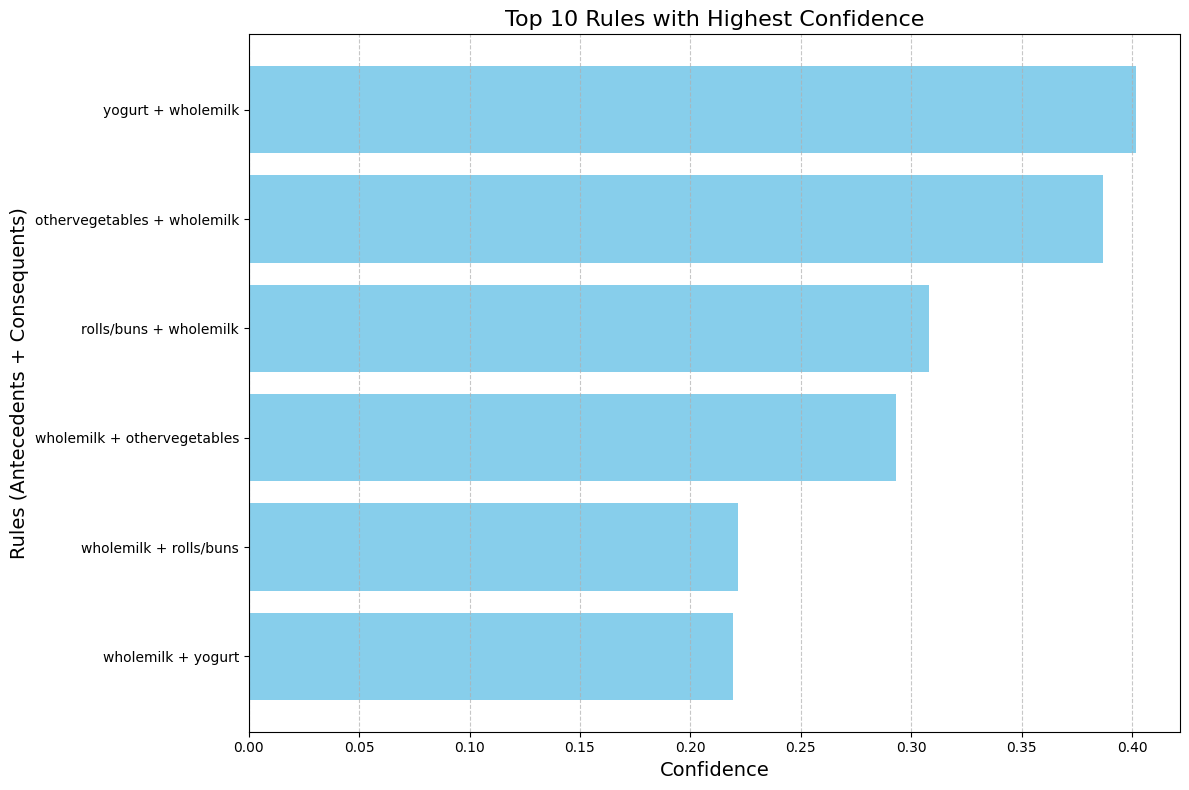

In [11]:
import matplotlib.pyplot as plt
# Giả sử df_ar_low đã được định nghĩa, tiến hành lấy top 10 confidence cao nhất và vẽ biểu đồ

# Lấy top 10 dòng có confidence cao nhất, sắp xếp theo thứ tự tăng dần
df_top10 = df_ar_high.nlargest(10, 'confidence').sort_values(by='confidence', ascending=True)

# Tạo cột "rule" để ghép tên sản phẩm
df_top10["rule"] = df_top10["antecedents"].apply(lambda x: ", ".join(list(x))) + " + " + df_top10["consequents"].apply(lambda x: ", ".join(list(x)))

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(12, 8))
plt.barh(df_top10["rule"], df_top10["confidence"], color='skyblue')  # barh để vẽ cột ngang

# Tùy chỉnh biểu đồ
plt.title("Top 10 Rules with Highest Confidence", fontsize=16)
plt.xlabel("Confidence", fontsize=14)
plt.ylabel("Rules (Antecedents + Consequents)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
